## Setup & Loading in Data:

In [31]:
# Spark imports:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Other library imports:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [9]:
spark = SparkSession.builder.appName('2020EDA').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '4g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','4g')])

#print spark configuration settings
spark.sparkContext.getConf().getAll()

[('spark.stage.maxConsecutiveAttempts', '10'),
 ('spark.dynamicAllocation.minExecutors', '1'),
 ('spark.eventLog.enabled', 'true'),
 ('spark.submit.pyFiles',
  '/root/.ivy2/jars/com.johnsnowlabs.nlp_spark-nlp_2.12-4.4.0.jar,/root/.ivy2/jars/graphframes_graphframes-0.8.2-spark3.1-s_2.12.jar,/root/.ivy2/jars/com.typesafe_config-1.4.2.jar,/root/.ivy2/jars/org.rocksdb_rocksdbjni-6.29.5.jar,/root/.ivy2/jars/com.amazonaws_aws-java-sdk-bundle-1.11.828.jar,/root/.ivy2/jars/com.github.universal-automata_liblevenshtein-3.0.0.jar,/root/.ivy2/jars/com.google.cloud_google-cloud-storage-2.16.0.jar,/root/.ivy2/jars/com.navigamez_greex-1.0.jar,/root/.ivy2/jars/com.johnsnowlabs.nlp_tensorflow-cpu_2.12-0.4.4.jar,/root/.ivy2/jars/it.unimi.dsi_fastutil-7.0.12.jar,/root/.ivy2/jars/org.projectlombok_lombok-1.16.8.jar,/root/.ivy2/jars/com.google.guava_guava-31.1-jre.jar,/root/.ivy2/jars/com.google.guava_failureaccess-1.0.1.jar,/root/.ivy2/jars/com.google.guava_listenablefuture-9999.0-empty-to-avoid-conflict-

In [10]:
# Loading in data and converting to spark dataframes:
df_2020 = spark.read.csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/2020/Transportation_Network_Providers_-_Trips_-_2020.csv", inferSchema=True, header=True)
df_weather = spark.read.csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/weather/chicago 2020-01-01 to 2022-08-31.csv", inferSchema=True, header=True)
df_2020.printSchema()
df_weather.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tip: integer (nullable = true)
 |-- Additional Charges: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Shared Trip Authorized: boolean (nullable = true)
 |-- Trips Pooled: integer (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid Longitude: double (nullable = true)
 |-- Dropof

In [5]:
#display number of records by partition
def displaypartitions(df):
    #number of records by partition
    num = df.rdd.getNumPartitions()
    print("Partitions:", num)
    df.withColumn("partitionId", F.spark_partition_id())\
        .groupBy("partitionId")\
        .count()\
        .orderBy(F.asc("count"))\
        .show(num)

df_2020.rdd.getNumPartitions()

135

In [7]:
displaypartitions(df_2020)

Partitions: 135


+-----------+------+
|partitionId| count|
+-----------+------+
|        134|337327|
|         22|499083|
|        123|504285|
|        126|504809|
|        115|504841|
|         95|505099|
|         87|505483|
|         10|505553|
|        129|505717|
|        109|505821|
|         30|506415|
|         12|506815|
|        112|506840|
|        118|506913|
|          8|507499|
|         17|507526|
|         40|507585|
|         53|507693|
|         90|507836|
|         27|507856|
|         71|508094|
|        100|508435|
|        103|508829|
|         74|508860|
|         92|509111|
|        106|509156|
|         50|509316|
|         45|509490|
|         25|509572|
|         79|509585|
|         48|509604|
|         89|509853|
|         32|510003|
|         66|510055|
|         58|510094|
|         82|510167|
|         37|510177|
|         61|510194|
|          6|510259|
|         35|510618|
|         19|510748|
|          4|510798|
|         68|510849|
|         77|510867|
|         97|

In [11]:
# Repartitioning the data:
df_2020 = df_2020.repartition(135)

In [13]:
# Checking the partitions again:
displaypartitions(df_2020)

Partitions: 135


+-----------+------+
|partitionId| count|
+-----------+------+
|         94|370424|
|         95|370424|
|         93|370425|
|         96|370425|
|         92|370426|
|        100|370427|
|         97|370427|
|         91|370428|
|        101|370428|
|         99|370428|
|         98|370428|
|         90|370428|
|         89|370428|
|        102|370429|
|        103|370431|
|         88|370431|
|         85|370432|
|         86|370432|
|         87|370432|
|        104|370433|
|         84|370433|
|        105|370434|
|         83|370435|
|        106|370436|
|         82|370436|
|        107|370438|
|         81|370438|
|         80|370439|
|        108|370440|
|         76|370440|
|         78|370440|
|         77|370440|
|         79|370440|
|         75|370441|
|        109|370441|
|         74|370441|
|         73|370441|
|         71|370442|
|         72|370442|
|         70|370442|
|         68|370443|
|        112|370443|
|        110|370443|
|        111|370443|
|         69|

## Part Two: Cleaning up Data:

In [15]:
# Find the number of missing values for each column:
df_2020.select([F.count(F.when(df_2020[c].isNull(), c)).alias(c) for c in df_2020.columns]).show()

+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+------------------+----------+----------------------+------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+-------------------------+
|Trip ID|Trip Start Timestamp|Trip End Timestamp|Trip Seconds|Trip Miles|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|Fare| Tip|Additional Charges|Trip Total|Shared Trip Authorized|Trips Pooled|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid Location|
+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+------------------+----------+-------------------

In [16]:
# Number of observations with all the data in each column:
df_2020.dropna(how='any').count()

23700840

In [17]:
# Working with just data that contains full information and check for dupes:
df_2020 = df_2020.dropna(how='any', subset=['Trip Start Timestamp','Trip End Timestamp','Fare','Dropoff Community Area','Pickup Community Area'])
df_2020 = df_2020.dropDuplicates()
df_2020.count()

42092031

In [18]:
# Drop columns unlikely to be useful for analysis for speed of computation and rename columns to remove spacing for ease of code writing:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

df_2020 = df_2020.drop('Trips Pooled','Additional Charges','Shared Trip Authorized','Pickup Centroid Location','Dropoff Centroid Location')
df_2020 = df_2020.withColumnRenamed("Trip ID","ID").withColumnRenamed("Trip Start Timestamp","start_timestamp").withColumnRenamed("Trip End Timestamp","end_timestamp").withColumnRenamed("Trip Miles",\
                "miles").withColumnRenamed("Pickup Census Tract","pickup_tract").withColumnRenamed("Dropoff Census Tract","dropoff_tract").withColumnRenamed("Pickup Community Area","pickup_area"\
                ).withColumnRenamed("Dropoff Community Area","dropoff_area").withColumnRenamed("Trip Total","total").withColumnRenamed("Pickup Centroid Latitude","pickup_lat").withColumnRenamed(\
                "Pickup Centroid Longitude","pickup_lon").withColumnRenamed("Pickup Centroid Location","pickup_location").withColumnRenamed("Dropoff Centroid Latitude","dropoff_lat").withColumnRenamed(\
                "Dropoff Centroid Longitude","dropoff_lon").withColumnRenamed("Dropoff Centroid Location","dropoff_location")
# fix datatypes:
df_2020 = df_2020.withColumn('start_timestamp', F.to_timestamp(df_2020['start_timestamp'], 'MM/dd/yyyy hh:mm:ss a')).withColumn('end_timestamp', F.to_timestamp(df_2020['end_timestamp'], 'MM/dd/yyyy hh:mm:ss a'))
df_weather = df_weather.withColumn('datetime',F.to_date(df_weather['datetime'], "yyyy-MM-dd"))

In [19]:
# add the month column
df_2020 = df_2020.withColumn('month', F.month(df_2020.start_timestamp))
df_2020 = df_2020.withColumn('hour', F.hour(df_2020.start_timestamp))

## Part 3: Finding some trends:

In [20]:
# get rides that occurred within hyde park
# add kenwood and woodlawn to this list - only if the other location is hyde park                    
df_hp = df_2020.filter((df_2020.pickup_area == 41) & (df_2020.dropoff_area == 41))
df_kw = df_2020.filter(((df_2020.pickup_area == 41) & (df_2020.dropoff_area == 42)) | ((df_2020.pickup_area == 42) & (df_2020.dropoff_area == 41)))
df_wl = df_2020.filter(((df_2020.pickup_area == 41) & (df_2020.dropoff_area == 39)) | ((df_2020.pickup_area == 39) & (df_2020.dropoff_area == 41)))
df_area = df_hp.union(df_kw).union(df_wl)

In [21]:
df_area.show(5)

+--------------------+-------------------+-------------------+------------+-----+------------+-------------+-----------+------------+----+---+------------------+-------------+--------------+-------------+--------------+-----+----+
|                  ID|    start_timestamp|      end_timestamp|Trip Seconds|miles|pickup_tract|dropoff_tract|pickup_area|dropoff_area|Fare|Tip|             total|   pickup_lat|    pickup_lon|  dropoff_lat|   dropoff_lon|month|hour|
+--------------------+-------------------+-------------------+------------+-----+------------+-------------+-----------+------------+----+---+------------------+-------------+--------------+-------------+--------------+-----+----+
|e6f17293b17c401aa...|2020-12-01 13:15:00|2020-12-01 13:15:00|         152|  0.6|        null|         null|         41|          41| 5.0|  0|              6.23| 41.794090253| -87.592310855| 41.794090253| -87.592310855|   12|  13|
|1060c8bcd089c1b9d...|2020-11-20 13:00:00|2020-11-20 13:00:00|         323| 

<AxesSubplot:xlabel='month'>

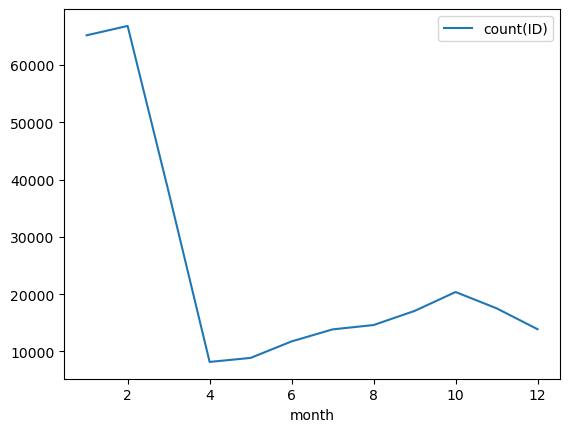

In [ ]:
df_area.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas().plot(x="month",y="count(ID)")

In [40]:
df_area.printSchema()

root
 |-- ID: string (nullable = true)
 |-- start_timestamp: timestamp (nullable = true)
 |-- end_timestamp: timestamp (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- miles: double (nullable = true)
 |-- pickup_tract: long (nullable = true)
 |-- dropoff_tract: long (nullable = true)
 |-- pickup_area: integer (nullable = true)
 |-- dropoff_area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tip: integer (nullable = true)
 |-- total: double (nullable = true)
 |-- pickup_lat: double (nullable = true)
 |-- pickup_lon: double (nullable = true)
 |-- dropoff_lat: double (nullable = true)
 |-- dropoff_lon: double (nullable = true)
 |-- month: integer (nullable = true)
 |-- hour: integer (nullable = true)



In [41]:
# Creating dataframe that approximates lyft program based on fare & time:
df_area_program = df_area.filter((df_area.Fare <= 15.0) & ((df_area.start_timestamp >= 17) | (df_area.start_timestamp < 4)))

AnalysisException: cannot resolve '(`start_timestamp` >= 17)' due to data type mismatch: differing types in '(`start_timestamp` >= 17)' (timestamp and int).;
'Filter ((Fare#222 <= 15.0) AND ((start_timestamp#1097 >= 17) OR (start_timestamp#1097 < 4)))
+- Union false, false
   :- Filter ((pickup_area#946 = 41) AND (dropoff_area#963 = 41))
   :  +- Project [ID#844, start_timestamp#1097, end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064, month#1165, hour(start_timestamp#1097, Some(Etc/UTC)) AS hour#1183]
   :     +- Project [ID#844, start_timestamp#1097, end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064, month(cast(start_timestamp#1097 as date)) AS month#1165]
   :        +- Project [ID#844, start_timestamp#1097, to_timestamp(end_timestamp#878, Some(MM/dd/yyyy hh:mm:ss a)) AS end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064]
   :           +- Project [ID#844, to_timestamp(start_timestamp#861, Some(MM/dd/yyyy hh:mm:ss a)) AS start_timestamp#1097, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064]
   :              +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, Dropoff Centroid Longitude#232 AS dropoff_lon#1064]
   :                 +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, Dropoff Centroid Latitude#231 AS dropoff_lat#1047, Dropoff Centroid Longitude#232]
   :                    +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, Pickup Centroid Longitude#229 AS pickup_lon#1014, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                       +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, Pickup Centroid Latitude#228 AS pickup_lat#997, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                          +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, Trip Total#225 AS total#980, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                             +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, Dropoff Community Area#221 AS dropoff_area#963, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, Pickup Community Area#220 AS pickup_area#946, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                   +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, Dropoff Census Tract#219L AS dropoff_tract#929L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                      +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, Pickup Census Tract#218L AS pickup_tract#912L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                         +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, Trip Miles#217 AS miles#895, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                            +- Project [ID#844, start_timestamp#861, Trip End Timestamp#215 AS end_timestamp#878, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                               +- Project [ID#844, Trip Start Timestamp#214 AS start_timestamp#861, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                  +- Project [Trip ID#213 AS ID#844, Trip Start Timestamp#214, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                     +- Project [Trip ID#213, Trip Start Timestamp#214, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                        +- Deduplicate [Pickup Centroid Longitude#229, Tip#223, Trip Total#225, Trip Seconds#216, Dropoff Census Tract#219L, Trip Start Timestamp#214, Trip ID#213, Shared Trip Authorized#226, Dropoff Centroid Longitude#232, Dropoff Community Area#221, Pickup Centroid Latitude#228, Additional Charges#224, Pickup Community Area#220, Trip Miles#217, Dropoff Centroid Location#233, Fare#222, Pickup Centroid Location#230, Trips Pooled#227, Trip End Timestamp#215, Dropoff Centroid Latitude#231, Pickup Census Tract#218L]
   :                                                           +- Filter AtLeastNNulls(n, Trip Start Timestamp#214,Trip End Timestamp#215,Fare#222,Dropoff Community Area#221,Pickup Community Area#220)
   :                                                              +- Repartition 135, true
   :                                                                 +- Relation[Trip ID#213,Trip Start Timestamp#214,Trip End Timestamp#215,Trip Seconds#216,Trip Miles#217,Pickup Census Tract#218L,Dropoff Census Tract#219L,Pickup Community Area#220,Dropoff Community Area#221,Fare#222,Tip#223,Additional Charges#224,Trip Total#225,Shared Trip Authorized#226,Trips Pooled#227,Pickup Centroid Latitude#228,Pickup Centroid Longitude#229,Pickup Centroid Location#230,Dropoff Centroid Latitude#231,Dropoff Centroid Longitude#232,Dropoff Centroid Location#233] csv
   :- Project [ID#844 AS ID#1202, start_timestamp#1097 AS start_timestamp#1203, end_timestamp#1114 AS end_timestamp#1204, Trip Seconds#216 AS Trip Seconds#1205, miles#895 AS miles#1206, pickup_tract#912L AS pickup_tract#1207L, dropoff_tract#929L AS dropoff_tract#1208L, pickup_area#946 AS pickup_area#1209, dropoff_area#963 AS dropoff_area#1210, Fare#222 AS Fare#1211, Tip#223 AS Tip#1212, total#980 AS total#1213, pickup_lat#997 AS pickup_lat#1214, pickup_lon#1014 AS pickup_lon#1215, dropoff_lat#1047 AS dropoff_lat#1216, dropoff_lon#1064 AS dropoff_lon#1217, month#1165 AS month#1218, hour#1183 AS hour#1219]
   :  +- Filter (((pickup_area#946 = 41) AND (dropoff_area#963 = 42)) OR ((pickup_area#946 = 42) AND (dropoff_area#963 = 41)))
   :     +- Project [ID#844, start_timestamp#1097, end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064, month#1165, hour(start_timestamp#1097, Some(Etc/UTC)) AS hour#1183]
   :        +- Project [ID#844, start_timestamp#1097, end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064, month(cast(start_timestamp#1097 as date)) AS month#1165]
   :           +- Project [ID#844, start_timestamp#1097, to_timestamp(end_timestamp#878, Some(MM/dd/yyyy hh:mm:ss a)) AS end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064]
   :              +- Project [ID#844, to_timestamp(start_timestamp#861, Some(MM/dd/yyyy hh:mm:ss a)) AS start_timestamp#1097, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064]
   :                 +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, Dropoff Centroid Longitude#232 AS dropoff_lon#1064]
   :                    +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, Dropoff Centroid Latitude#231 AS dropoff_lat#1047, Dropoff Centroid Longitude#232]
   :                       +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, Pickup Centroid Longitude#229 AS pickup_lon#1014, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                          +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, Pickup Centroid Latitude#228 AS pickup_lat#997, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                             +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, Trip Total#225 AS total#980, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, Dropoff Community Area#221 AS dropoff_area#963, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                   +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, Pickup Community Area#220 AS pickup_area#946, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                      +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, Dropoff Census Tract#219L AS dropoff_tract#929L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                         +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, Pickup Census Tract#218L AS pickup_tract#912L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                            +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, Trip Miles#217 AS miles#895, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                               +- Project [ID#844, start_timestamp#861, Trip End Timestamp#215 AS end_timestamp#878, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                  +- Project [ID#844, Trip Start Timestamp#214 AS start_timestamp#861, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                     +- Project [Trip ID#213 AS ID#844, Trip Start Timestamp#214, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                        +- Project [Trip ID#213, Trip Start Timestamp#214, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
   :                                                           +- Deduplicate [Pickup Centroid Longitude#229, Tip#223, Trip Total#225, Trip Seconds#216, Dropoff Census Tract#219L, Trip Start Timestamp#214, Trip ID#213, Shared Trip Authorized#226, Dropoff Centroid Longitude#232, Dropoff Community Area#221, Pickup Centroid Latitude#228, Additional Charges#224, Pickup Community Area#220, Trip Miles#217, Dropoff Centroid Location#233, Fare#222, Pickup Centroid Location#230, Trips Pooled#227, Trip End Timestamp#215, Dropoff Centroid Latitude#231, Pickup Census Tract#218L]
   :                                                              +- Filter AtLeastNNulls(n, Trip Start Timestamp#214,Trip End Timestamp#215,Fare#222,Dropoff Community Area#221,Pickup Community Area#220)
   :                                                                 +- Repartition 135, true
   :                                                                    +- Relation[Trip ID#213,Trip Start Timestamp#214,Trip End Timestamp#215,Trip Seconds#216,Trip Miles#217,Pickup Census Tract#218L,Dropoff Census Tract#219L,Pickup Community Area#220,Dropoff Community Area#221,Fare#222,Tip#223,Additional Charges#224,Trip Total#225,Shared Trip Authorized#226,Trips Pooled#227,Pickup Centroid Latitude#228,Pickup Centroid Longitude#229,Pickup Centroid Location#230,Dropoff Centroid Latitude#231,Dropoff Centroid Longitude#232,Dropoff Centroid Location#233] csv
   +- Project [ID#844 AS ID#1238, start_timestamp#1097 AS start_timestamp#1239, end_timestamp#1114 AS end_timestamp#1240, Trip Seconds#216 AS Trip Seconds#1241, miles#895 AS miles#1242, pickup_tract#912L AS pickup_tract#1243L, dropoff_tract#929L AS dropoff_tract#1244L, pickup_area#946 AS pickup_area#1245, dropoff_area#963 AS dropoff_area#1246, Fare#222 AS Fare#1247, Tip#223 AS Tip#1248, total#980 AS total#1249, pickup_lat#997 AS pickup_lat#1250, pickup_lon#1014 AS pickup_lon#1251, dropoff_lat#1047 AS dropoff_lat#1252, dropoff_lon#1064 AS dropoff_lon#1253, month#1165 AS month#1254, hour#1183 AS hour#1255]
      +- Filter (((pickup_area#946 = 41) AND (dropoff_area#963 = 39)) OR ((pickup_area#946 = 39) AND (dropoff_area#963 = 41)))
         +- Project [ID#844, start_timestamp#1097, end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064, month#1165, hour(start_timestamp#1097, Some(Etc/UTC)) AS hour#1183]
            +- Project [ID#844, start_timestamp#1097, end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064, month(cast(start_timestamp#1097 as date)) AS month#1165]
               +- Project [ID#844, start_timestamp#1097, to_timestamp(end_timestamp#878, Some(MM/dd/yyyy hh:mm:ss a)) AS end_timestamp#1114, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064]
                  +- Project [ID#844, to_timestamp(start_timestamp#861, Some(MM/dd/yyyy hh:mm:ss a)) AS start_timestamp#1097, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, dropoff_lon#1064]
                     +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, dropoff_lat#1047, Dropoff Centroid Longitude#232 AS dropoff_lon#1064]
                        +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, pickup_lon#1014, Dropoff Centroid Latitude#231 AS dropoff_lat#1047, Dropoff Centroid Longitude#232]
                           +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, pickup_lat#997, Pickup Centroid Longitude#229 AS pickup_lon#1014, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                              +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, total#980, Pickup Centroid Latitude#228 AS pickup_lat#997, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                 +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, dropoff_area#963, Fare#222, Tip#223, Trip Total#225 AS total#980, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                    +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, pickup_area#946, Dropoff Community Area#221 AS dropoff_area#963, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                       +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, dropoff_tract#929L, Pickup Community Area#220 AS pickup_area#946, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                          +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, pickup_tract#912L, Dropoff Census Tract#219L AS dropoff_tract#929L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                             +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, miles#895, Pickup Census Tract#218L AS pickup_tract#912L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                                +- Project [ID#844, start_timestamp#861, end_timestamp#878, Trip Seconds#216, Trip Miles#217 AS miles#895, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                                   +- Project [ID#844, start_timestamp#861, Trip End Timestamp#215 AS end_timestamp#878, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                                      +- Project [ID#844, Trip Start Timestamp#214 AS start_timestamp#861, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                                         +- Project [Trip ID#213 AS ID#844, Trip Start Timestamp#214, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                                            +- Project [Trip ID#213, Trip Start Timestamp#214, Trip End Timestamp#215, Trip Seconds#216, Trip Miles#217, Pickup Census Tract#218L, Dropoff Census Tract#219L, Pickup Community Area#220, Dropoff Community Area#221, Fare#222, Tip#223, Trip Total#225, Pickup Centroid Latitude#228, Pickup Centroid Longitude#229, Dropoff Centroid Latitude#231, Dropoff Centroid Longitude#232]
                                                               +- Deduplicate [Pickup Centroid Longitude#229, Tip#223, Trip Total#225, Trip Seconds#216, Dropoff Census Tract#219L, Trip Start Timestamp#214, Trip ID#213, Shared Trip Authorized#226, Dropoff Centroid Longitude#232, Dropoff Community Area#221, Pickup Centroid Latitude#228, Additional Charges#224, Pickup Community Area#220, Trip Miles#217, Dropoff Centroid Location#233, Fare#222, Pickup Centroid Location#230, Trips Pooled#227, Trip End Timestamp#215, Dropoff Centroid Latitude#231, Pickup Census Tract#218L]
                                                                  +- Filter AtLeastNNulls(n, Trip Start Timestamp#214,Trip End Timestamp#215,Fare#222,Dropoff Community Area#221,Pickup Community Area#220)
                                                                     +- Repartition 135, true
                                                                        +- Relation[Trip ID#213,Trip Start Timestamp#214,Trip End Timestamp#215,Trip Seconds#216,Trip Miles#217,Pickup Census Tract#218L,Dropoff Census Tract#219L,Pickup Community Area#220,Dropoff Community Area#221,Fare#222,Tip#223,Additional Charges#224,Trip Total#225,Shared Trip Authorized#226,Trips Pooled#227,Pickup Centroid Latitude#228,Pickup Centroid Longitude#229,Pickup Centroid Location#230,Dropoff Centroid Latitude#231,Dropoff Centroid Longitude#232,Dropoff Centroid Location#233] csv


In [39]:
print(df_area_program.count())

0


In [38]:
df_area_program.select(F.approxCountDistinct("ID", rsd=0.05)).show()

+-------------------------+
|approx_count_distinct(ID)|
+-------------------------+
|                        0|
+-------------------------+



In [36]:
# Counting how 
df_area.select(F.approxCountDistinct("ID", rsd=0.05)).show()

+-------------------------+
|approx_count_distinct(ID)|
+-------------------------+
|                   304886|
+-------------------------+



In [ ]:
df_area_non_program = df_area - df_area_program

<AxesSubplot:xlabel='month'>

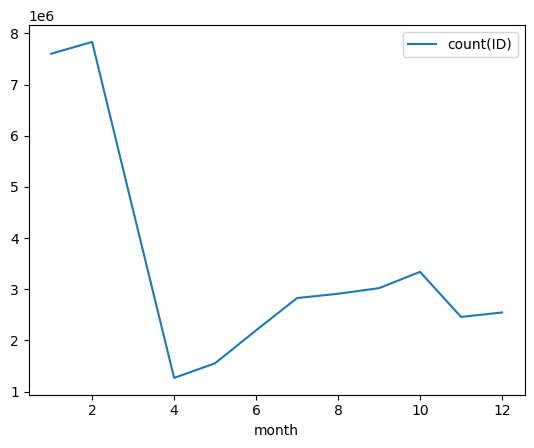

In [34]:
# basic plots for all rides (not just in the program area)
df_2020.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas().plot(x="month",y="count(ID)")

<AxesSubplot:xlabel='pickup_area'>

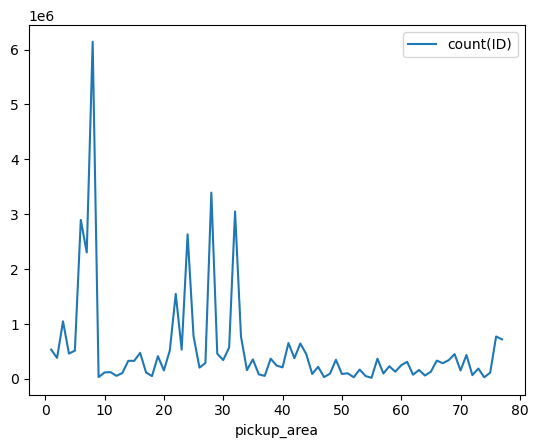

In [ ]:
df_2020.groupby("pickup_area").agg({'ID':'count'}).orderBy(F.col('pickup_area').asc()).toPandas().plot(x="pickup_area",y="count(ID)")

<AxesSubplot:xlabel='dropoff_area'>

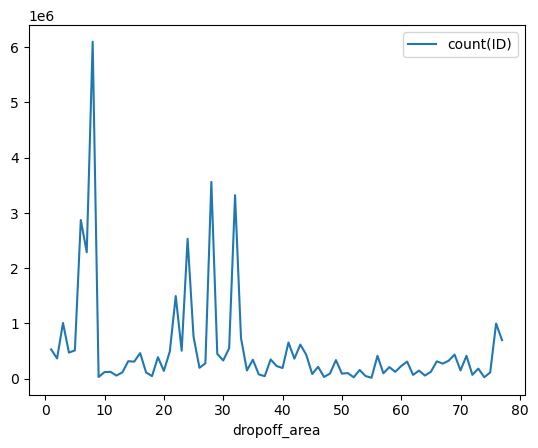

In [28]:
df_2020.groupby("dropoff_area").agg({'ID':'count'}).orderBy(F.col('dropoff_area').asc()).toPandas().plot(x="dropoff_area", y="count(ID)")

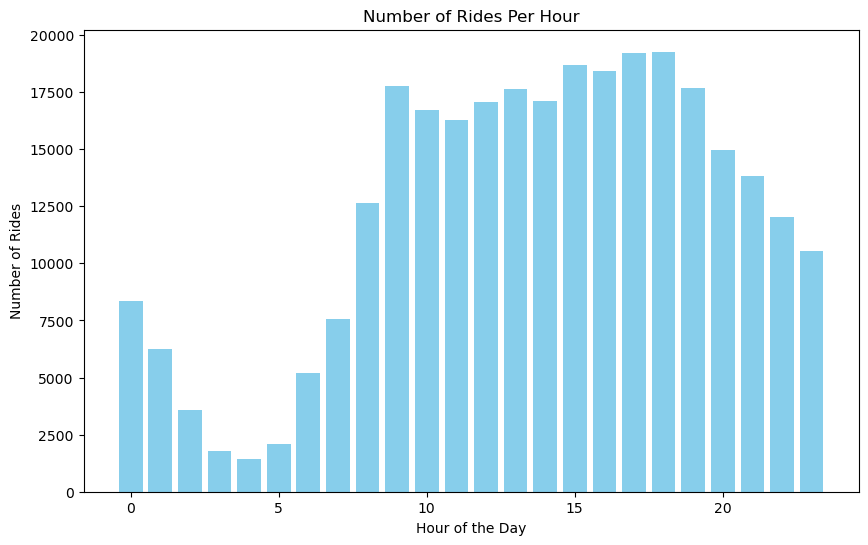

In [42]:
# rides per hour:
rides_per_hour = df_area.groupBy("hour").count().orderBy("hour")

# Convert the result to Pandas for local plotting
rides_per_hour_pd = rides_per_hour.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(rides_per_hour_pd["hour"], rides_per_hour_pd["count"], color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Per Hour")
plt.show()

## we still don't know how to do these, if you figure it out pls share
Plot Cloropleths (for all of chicago)

heat map of dropoff location and pickup location (for in-program rides)

add vertical lines at and key shifts in the program policy--to do this we need documents which I'll collect. 